In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir_train = pathlib.Path(r"C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r'C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


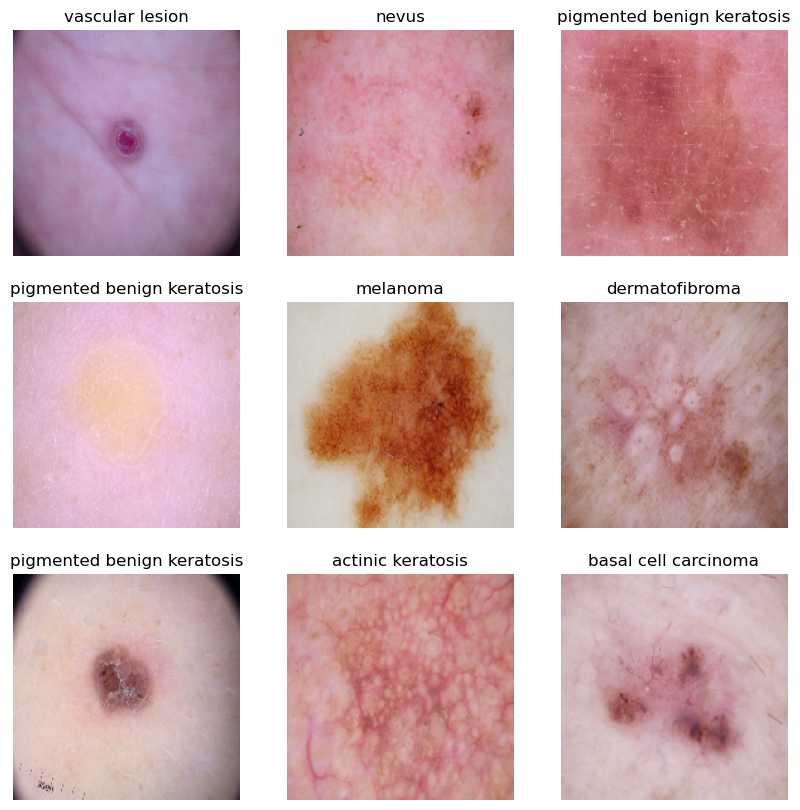

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = 9 
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 305ms/step - loss: 2.0628 - accuracy: 0.2215 - val_loss: 1.9035 - val_accuracy: 0.2819
Epoch 2/20
56/56 [==============================] - 18s 330ms/step - loss: 1.7679 - accuracy: 0.3426 - val_loss: 1.6308 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 18s 325ms/step - loss: 1.5495 - accuracy: 0.4581 - val_loss: 1.4551 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 18s 325ms/step - loss: 1.4170 - accuracy: 0.4961 - val_loss: 1.3942 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 18s 324ms/step - loss: 1.2830 - accuracy: 0.5580 - val_loss: 1.4096 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 18s 324ms/step - loss: 1.2069 - accuracy: 0.5698 - val_loss: 1.4189 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 18s 323ms/step - loss: 1.1700 - accuracy: 0.5843 - val_loss: 1.4485 - val_accuracy: 0.5436

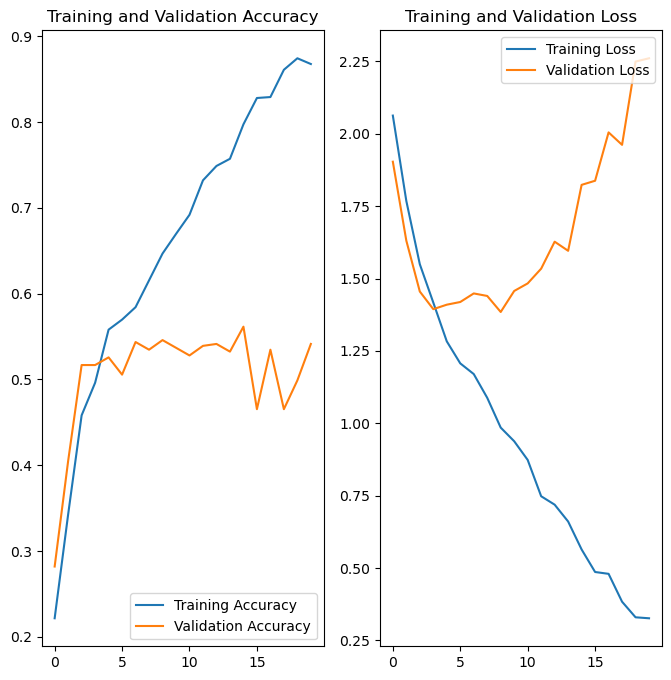

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])


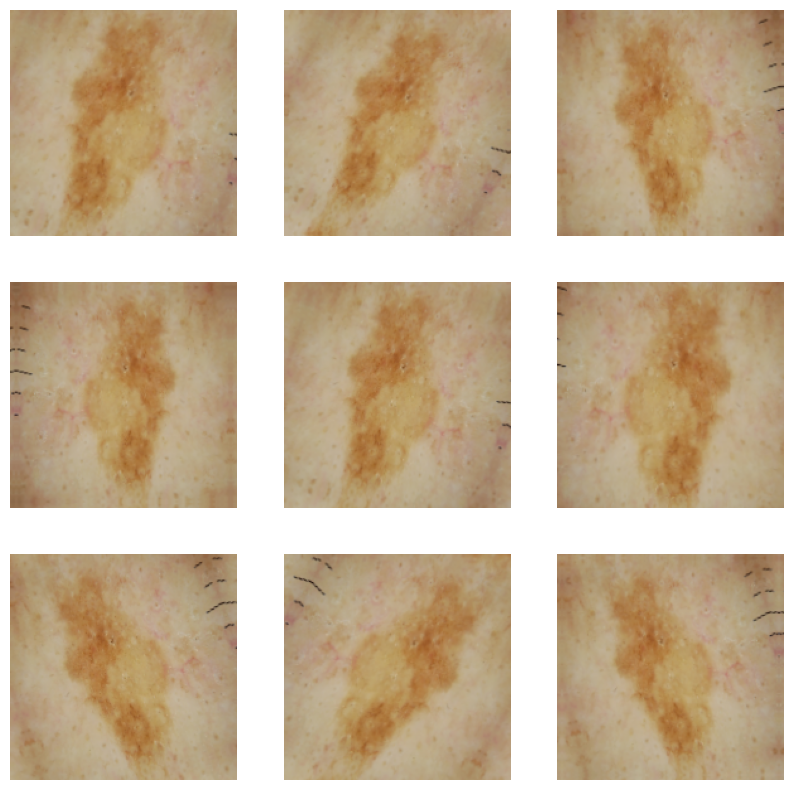

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 365ms/step - loss: 2.1049 - accuracy: 0.1842 - val_loss: 2.0195 - val_accuracy: 0.2304
Epoch 2/20
56/56 [==============================] - 23s 407ms/step - loss: 1.9512 - accuracy: 0.2718 - val_loss: 1.8982 - val_accuracy: 0.3110
Epoch 3/20
56/56 [==============================] - 24s 421ms/step - loss: 1.8678 - accuracy: 0.3058 - val_loss: 1.8262 - val_accuracy: 0.3826
Epoch 4/20
56/56 [==============================] - 23s 417ms/step - loss: 1.6824 - accuracy: 0.3973 - val_loss: 1.5750 - val_accuracy: 0.4094
Epoch 5/20
56/56 [==============================] - 24s 427ms/step - loss: 1.5866 - accuracy: 0.4386 - val_loss: 1.5234 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 23s 420ms/step - loss: 1.4146 - accuracy: 0.4967 - val_loss: 1.3628 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 24s 427ms/step - loss: 1.3562 - accuracy: 0.5234 - val_loss: 1.3935 - val_accuracy: 0.5280

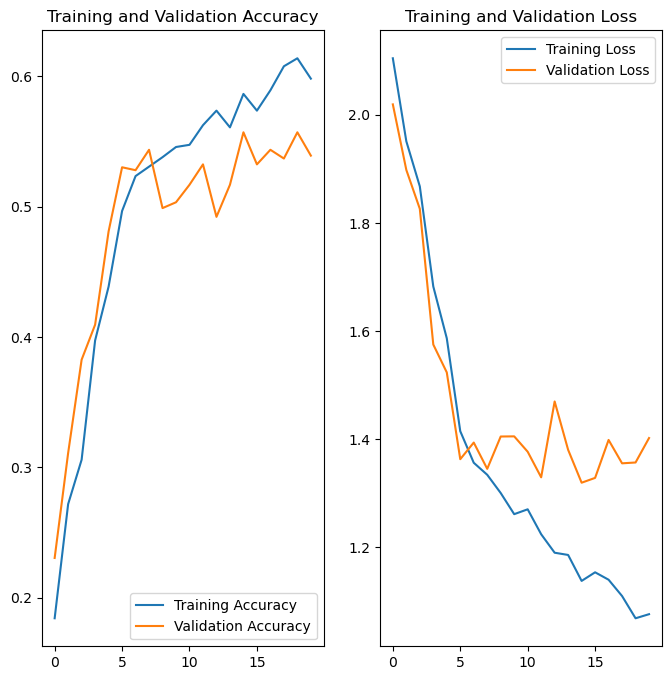

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [23]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('C:\\Users\\Nivetha\\Downloads\\archive (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\Nivetha\\Downloads\\archive (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis')]


In [24]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
1,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
2,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
3,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
4,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis


In [25]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [26]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

In [27]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29D03AAAC10>: 100%|█| 500/500 [00:03<00:00, 137.38 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29D03AF3970>: 100%|█| 500/500 [00:03<00:00, 156.45 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29D03832040>: 100%|█| 500/500 [00:03<00:00, 151.48 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2816x2112 at 0x29D038624F0>: 100%|█| 500/500 [00:22<0


Initialised with 357 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29D03029430>: 100%|█| 500/500 [00:23<00:


Initialised with 462 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29D0371F5E0>: 100%|█| 500/500 [00:05<00:00, 91.99 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29D03899070>: 100%|█| 500/500 [00:11<00:00, 42.04 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29D03351160>: 100%|█| 500/500 [00:05<00:00, 92.24 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\Nivetha\Downloads\archive (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29D03862D00>: 100%|█| 500/500 [00:05<00:


In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [29]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:2]

['C:\\Users\\Nivetha\\Downloads\\archive (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3d689432-ca12-43c9-a2a6-e24f1a45d83a.jpg',
 'C:\\Users\\Nivetha\\Downloads\\archive (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_945cfc65-0fcf-447e-ab71-624856595db1.jpg']

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['actinic keratosis', 'actinic keratosis']

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.shape

C:\Users\Nivetha\AppData\Local\Temp\ipykernel_16312\4293209412.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


(6739, 2)

In [33]:
new_df.head()

,Path,Label
0,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
1,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
2,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
3,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis
4,C:\Users\Nivetha\Downloads\archive (1)\Skin ca...,actinic keratosis


In [34]:
new_df['Label'].value_counts(normalize=True)

pigmented benign keratosis    0.142751
melanoma                      0.139190
basal cell carcinoma          0.129990
nevus                         0.127170
squamous cell carcinoma       0.101054
vascular lesion               0.094821
actinic keratosis             0.091111
dermatofibroma                0.088292
seborrheic keratosis          0.085621
Name: Label, dtype: float64

In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [39]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 85s 498ms/step - loss: 1.9747 - accuracy: 0.2239 - val_loss: 1.5793 - val_accuracy: 0.4024
Epoch 2/30
169/169 [==============================] - 80s 471ms/step - loss: 1.5387 - accuracy: 0.4106 - val_loss: 1.3994 - val_accuracy: 0.4714
Epoch 3/30
169/169 [==============================] - 81s 477ms/step - loss: 1.4038 - accuracy: 0.4624 - val_loss: 1.3466 - val_accuracy: 0.4818
Epoch 4/30
169/169 [==============================] - 83s 488ms/step - loss: 1.3331 - accuracy: 0.4909 - val_loss: 1.3551 - val_accuracy: 0.4863
Epoch 5/30
169/169 [==============================] - 88s 521ms/step - loss: 1.2775 - accuracy: 0.5102 - val_loss: 1.2509 - val_accuracy: 0.5182
Epoch 6/30
169/169 [==============================] - 84s 493ms/step - loss: 1.2172 - accuracy: 0.5299 - val_loss: 1.2171 - val_accuracy: 0.5479
Epoch 7/30
169/169 [==============================] - 83s 490ms/step - loss: 1.1922 - accuracy: 0.5401 - val_loss: 1.1422 - val_ac

In [42]:
model.save('finalyearproject_model.h5')

In [51]:
from tensorflow.keras.models import load_model
from PIL import Image
model = tf.keras.models.load_model("finalyearproject_model.h5")
img = Image.open(r"C:\Users\Nivetha\OneDrive\Desktop\test images\ISIC_0024382.jpg")
img = img.resize((180, 180))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = ['pigmented benign keratosis', 'melanoma ', 'basal cell carcinoma', 'nevus', 'squamous cell carcinoma', 'vascular lesion', 'actinic keratosis', 'dermatofibroma', 'seborrheic keratosis']
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

nevus
